<a href="https://colab.research.google.com/github/Bibitpamungkas/TugasBesar_Citra/blob/kelompok/Final_Progres_Using_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tulis Program Anda Disini!
# Basic Imports
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

# Imports untuk membangun CNN
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install kaggle

In [ ]:
%cd /content/gdrive/MyDrive/content/sample_data/

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/content/sample_data/'
/content


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/tmp/"

In [ ]:
# jika anda ingin menggunakan kaggle API untuk mengunduh dataset gunakan
# kode berikut untuk membantu anda membuat config kaggle.json
# pastikan anda mendaftar akun kaggle terlebih dahulu
# kemudian menuju halaman my account dan buat token API anda

api_token = {"username":"bibitpamungkas","key":"0b4a500fd9a858ee152de296398002ab"}
import json
import zipfile
import os
with open('/tmp/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /tmp/kaggle.json

In [ ]:
!kaggle datasets download -d denizkavi1/brain-tumor

 97% 681M/700M [00:25<00:00, 42.9MB/s]
100% 700M/700M [00:25<00:00, 28.4MB/s]


In [ ]:
# Ekstrak dataset

import os
import zipfile

os.makedirs('/tmp/brain-tumor')

local_zip = '/content/brain-tumor.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/brain-tumor')
zip_ref.close()

In [ ]:
import os
base_dataset = '/tmp/brain-tumor'
class_dir = ['1','2','3']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir, item))

In [ ]:
import os
import shutil

#brain-tumoring dataset manual

dataset_splt = "/tmp/brain-tumor"
os.makedirs('/tmp/brain-tumor/train')
os.makedirs('/tmp/brain-tumor/val')
os.makedirs('/tmp/brain-tumor/test')

train = os.path.join(dataset_splt,'train')
val = os.path.join(dataset_splt,'val')
test = os.path.join(dataset_splt,'test')

#1
x1_dataset = '/tmp/brain-tumor/1'
os.makedirs('/tmp/brain-tumor/train/1')
os.makedirs('/tmp/brain-tumor/val/1')
os.makedirs('/tmp/brain-tumor/test/1')

pp_tr = os.path.join(train,'1')
pp_va = os.path.join(val,'1')
pp_ts = os.path.join(test,'1')

#70% data training
x1_dataset1= os.listdir(x1_dataset)
for file in x1_dataset1[0:int(len(x1_dataset1)* .8)]:
  new_path = shutil.move(f"{x1_dataset}/{file}",pp_tr)

#15% data validation
x1_dataset2= os.listdir(x1_dataset)
for file in x1_dataset2[0:int(len(x1_dataset1)* .19)]:
  new_path = shutil.move(f"{x1_dataset}/{file}",pp_va)

#15% data testing
x1_dataset3= os.listdir(x1_dataset)
for file in x1_dataset3:
  new_path = shutil.move(f"{x1_dataset}/{file}",pp_ts)


#2
y2_dataset = '/tmp/brain-tumor/2'
os.makedirs('/tmp/brain-tumor/train/2')
os.makedirs('/tmp/brain-tumor/val/2')
os.makedirs('/tmp/brain-tumor/test/2')

rk_tr = os.path.join(train,'2')
rk_va = os.path.join(val,'2')
rk_ts = os.path.join(test,'2')

#70% data training
y2_dataset1= os.listdir(y2_dataset)
for file in y2_dataset1[0:int(len(y2_dataset1)* .8)]:
  new_path = shutil.move(f"{y2_dataset}/{file}",rk_tr)

#15% data validation
y2_dataset2= os.listdir(y2_dataset)
for file in y2_dataset2[0:int(len(y2_dataset1)* .19)]:
  new_path = shutil.move(f"{y2_dataset}/{file}",rk_va)

#15% data testing
y2_dataset3= os.listdir(y2_dataset)
for file in y2_dataset3:
  new_path = shutil.move(f"{y2_dataset}/{file}",rk_ts)

#3
z3_dataset = '/tmp/brain-tumor/3'
os.makedirs('/tmp/brain-tumor/train/3')
os.makedirs('/tmp/brain-tumor/val/3')
os.makedirs('/tmp/brain-tumor/test/3')

ss_tr = os.path.join(train,'3')
ss_va = os.path.join(val,'3')
ss_ts = os.path.join(test,'3')

#70% data training
z3_dataset1= os.listdir(z3_dataset)
for file in z3_dataset1[0:int(len(z3_dataset1)* .8)]:
  new_path = shutil.move(f"{z3_dataset}/{file}",ss_tr)

#15% data validation
z3_dataset2= os.listdir(z3_dataset)
for file in z3_dataset2[0:int(len(z3_dataset1)* .19)]:
  new_path = shutil.move(f"{z3_dataset}/{file}",ss_va)

#15% data testing
z3_dataset3= os.listdir(z3_dataset)
for file in z3_dataset3:
  new_path = shutil.move(f"{z3_dataset}/{file}",ss_ts)

#file train, val, and test
file_train_1 = os.listdir(pp_tr)
file_val_1 = os.listdir(pp_va)
file_test_1 = os.listdir(pp_ts)
file_train_2 = os.listdir(rk_tr)
file_val_2 = os.listdir(rk_va)
file_test_2 = os.listdir(rk_ts)
file_train_3 = os.listdir(ss_tr)
file_val_3 = os.listdir(ss_va)
file_test_3 = os.listdir(ss_ts)

#print jumlah data train, val, and test
print("Data 1 Train : " + str(len(file_train_1)))
print("Data 1 Validation : " + str(len(file_val_1)))
print("Data 1 Test : " + str(len(file_test_1)))
print("Data 2 Train : " + str(len(file_train_2)))
print("Data 2 Validation : " + str(len(file_val_2)))
print("Data 2 Test : " + str(len(file_test_2)))
print("Data 3 Train : " + str(len(file_train_3)))
print("Data 3 Validation : " + str(len(file_val_3)))
print("Data 3 Test : " + str(len(file_test_3)))

Data 1 Train : 566
Data 1 Validation : 134
Data 1 Test : 8
Data 2 Train : 1140
Data 2 Validation : 270
Data 2 Test : 16
Data 3 Train : 744
Data 3 Validation : 176
Data 3 Test : 10


In [ ]:
import os
os.listdir('/tmp/brain-tumor')

['2', 'test', '3', 'val', 'train', '1']

In [ ]:
%cd '/tmp/brain-tumor'

/tmp/brain-tumor


In [ ]:
import numpy as np
import json
import os
import cv2
import copy
import sklearn.metrics as metric
import pandas as pd
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint 

from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

import matplotlib.pyplot as plt
import matplotlib

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *

In [ ]:
EPOCHS = 50
INIT_LR = 1e-3
BS = 16
IMAGE_SIZE = (128, 128)
checkpoint_path = "model2/training_3_subclass_cp/cp.ckpt"
feature_path = "model2/training_3_subclass_feature.json"
model_path = "model2/training_3_subclass_model.h5"
history_path = "model2/training_3_subclass_history.json"
base_dataset = "/tmp/brain-tumor"
class_dir = ['1','2','3']

In [ ]:
print("[INFO] indexing file images Otomatch dataset...")
type_dataset = [ 'train','val']
dataset_train = []
dataset_val = []
for type_set in type_dataset:
    for class_item in class_dir:
        cur_dir = os.path.join(base_dataset, type_set, class_item)
        for file in os.listdir(cur_dir):
            if type_set == 'train':
                dataset_train.append(os.path.join(cur_dir, file))
            else:
                dataset_val.append(os.path.join(cur_dir, file))

print("[INFO] load images Otomatch dataset...")
# load images
train_images = []
val_images = []
for type_set in type_dataset:
    cur_dataset = dataset_train if type_set == 'train' else dataset_val
    for image_path in cur_dataset:
        if ".png" in image_path:
            image = cv2.imread(image_path)
            image = cv2.resize(image, IMAGE_SIZE)
            if type_set == 'train':
                train_images.append(image)
            else:
                val_images.append(image)

[INFO] indexing file images Otomatch dataset...
[INFO] load images Otomatch dataset...


In [ ]:
# normalization
print("[INFO] normalization...")
train_x = np.array(train_images).astype("float32") / 255.0
val_x = np.array(val_images).astype("float32") / 255.0

[INFO] normalization...


In [ ]:
# augmentation layer
data_augmentation = tf.keras.Sequential([layers.RandomFlip("horizontal_and_vertical"),
                                         layers.RandomRotation(0.2),
                                         layers.RandomContrast(0.2),
                                         layers.RandomTranslation(0.3,0.3)])

In [ ]:
class ConvAutoEncoder:
    """
    Core Convolutional AutoEncoder
    This class included with build method you can adjust of width height and depth of image
    default filters 32, and latent dimension 16
    """
    @staticmethod
    def build(width, height, depth, filters=(32,), latent_dim=16):
        input_shape = (height, width, depth)
        channel_dim = -1
        inputs = layers.Input(shape=input_shape)
        x = inputs
        x = data_augmentation(x)
        # Encoder layer
        for f in filters:
            x = layers.Conv2D(f, (3, 3), strides=2, padding='same')(x)
            x = layers.LeakyReLU(alpha=0.2)(x)
            x = layers.BatchNormalization(axis=channel_dim, name='enc_filter_' + str(32))(x)
        volume_size = K.int_shape(x)
        x = layers.Flatten()(x)
        # Latent layer
        latent = layers.Dense(latent_dim, name="encoded")(x)
        # Decoder layer
        x = layers.Dense(np.prod(volume_size[1:]))(latent)
        x = layers.Reshape((volume_size[1], volume_size[2], volume_size[3]))(x)
        # Reverse on decoder
        for f in filters[::-1]:
            x = layers.Conv2DTranspose(f, (3, 3), strides=2, padding='same')(x)
            x = layers.LeakyReLU(alpha=0.2)(x)
            x = layers.BatchNormalization(axis=channel_dim, name='dec_filter_' + str(f))(x)
        x = layers.Conv2DTranspose(depth, (3, 3), padding="same")(x)
        outputs = layers.Activation("sigmoid", name="decoded")(x)
        auto_encoder = Model(inputs, outputs, name="auto_encoder")
        return auto_encoder

In [ ]:
print("[INFO] building auto encoder...")
auto_encoder = ConvAutoEncoder.build(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor="val_loss",
    verbose = 1,
    mode='min',
    save_best_only=True)
auto_encoder.compile(loss="mse", optimizer=opt, metrics='accuracy')
auto_encoder.summary()

[INFO] building auto encoder...
Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 enc_filter_32 (BatchNormali  (None, 64, 64, 32)       128       
 zation)                                                         
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                      

In [ ]:
# train the convolutional auto encoder
print("[INFO] training auto encoder...")
H = auto_encoder.fit(
    train_x, train_x,
    shuffle=True,
    validation_data=(val_x, val_x),
    epochs=EPOCHS,
    callbacks = [checkpoint_callback], batch_size=BS)

[INFO] training auto encoder...
Epoch 1/50
154/154 [==============================] - ETA: 0s - loss: 0.0209 - accuracy: 0.8465
Epoch 00001: val_loss improved from inf to 0.01816, saving model to model2/training_3_subclass_cp/cp.ckpt
154/154 [==============================] - 19s 43ms/step - loss: 0.0209 - accuracy: 0.8465 - val_loss: 0.0182 - val_accuracy: 0.9416
Epoch 2/50
153/154 [============================>.] - ETA: 0s - loss: 0.0072 - accuracy: 0.9541
Epoch 00002: val_loss improved from 0.01816 to 0.01561, saving model to model2/training_3_subclass_cp/cp.ckpt
154/154 [==============================] - 6s 39ms/step - loss: 0.0072 - accuracy: 0.9541 - val_loss: 0.0156 - val_accuracy: 0.9563
Epoch 3/50
153/154 [============================>.] - ETA: 0s - loss: 0.0070 - accuracy: 0.9554
Epoch 00003: val_loss improved from 0.01561 to 0.01087, saving model to model2/training_3_subclass_cp/cp.ckpt
154/154 [==============================] - 6s 39ms/step - loss: 0.0070 - accuracy: 0.9554

In [ ]:
auto_encoder.save('autoencoder.h5')
from google.colab import files


files.download('autoencoder.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#with open(history_path, 'w') as f:
#    json.dump(H.history, f)
#auto_encoder.save(model_path)

In [ ]:
reconstruction_score = auto_encoder.evaluate(val_x, val_x, verbose=0)
print("Convolutional autoencoder score:", reconstruction_score)
print("Test Loss:", reconstruction_score[0])
print("Test Accuracy:", reconstruction_score[1])

Convolutional autoencoder score: [0.007691144943237305, 0.9550862312316895]
Test Loss: 0.007691144943237305
Test Accuracy: 0.9550862312316895


In [ ]:
auto_encoder = ConvAutoEncoder.build(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
# load our auto_encoder from disk
print("[INFO] loading auto encoder model...")
auto_encoder.load_weights(checkpoint_path)

#auto_encoder.save('model2/training_model.h5')
#auto_encoder.save_weights('model2/weight_model.h5')

# create the encoder model which consists of *just* the encoder
# portion of the auto encoder
encoder = Model(inputs=auto_encoder.input, outputs=auto_encoder.get_layer("encoded").output)

# quantify the contents of our input images using the encoder
print("[INFO] encoding images...")
features = encoder.predict(train_x)

[INFO] loading auto encoder model...
[INFO] encoding images...


In [ ]:
indexes = list(range(0, train_x.shape[0]))
features_array = [[float(x) for x in y] for y in features]
labels = [path.split("/")[2] for path in dataset_train]
data = {"indexes": indexes, "features": features_array, "locations": dataset_train, "labels":labels}

In [ ]:
with open(feature_path, 'w') as f:
    json.dump(data, f)

In [ ]:
def euclidean(a, b):
	# compute and return the euclidean distance between two vectors
	return np.linalg.norm(a - b)

In [ ]:
def perform_search(query_features, indexed_train, max_results=5):
	retrieved = []
	for idx in range(0, len(indexed_train["features"])):
		distance = euclidean(query_features, indexed_train["features"][idx])
		retrieved.append((distance, idx))
	retrieved = sorted(retrieved)[:max_results]
	return retrieved

In [ ]:
print("[INFO] indexing file images Otomatch dataset...")
# indexing file images
dataset = []
for class_item in class_dir:
    cur_dir = os.path.join(base_dataset, 'test', class_item)
    for file in os.listdir(cur_dir):
        dataset.append(os.path.join(cur_dir, file))
print("test len to retrieving:", len(dataset))
print("[INFO] load test images Otomatch dataset...")
#  load images
images = []
for image_path in dataset:
    if ".png" in image_path:
        image = cv2.imread(image_path)
        image = cv2.resize(image, IMAGE_SIZE)
        images.append(image)

[INFO] indexing file images Otomatch dataset...
test len to retrieving: 34
[INFO] load test images Otomatch dataset...


In [ ]:
# normalization
print("[INFO] normalization...")
test_x = np.array(images).astype("float32") / 255.0

[INFO] normalization...


In [ ]:
auto_encoder = ConvAutoEncoder.build(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
# load our auto_encoder from disk
print("[INFO] loading auto encoder model...")
auto_encoder.load_weights(checkpoint_path)
with open(feature_path) as f:
  training_indexed = json.load(f)

# create the encoder model which consists of *just* the encoder
# portion of the auto encoder
encoder = Model(inputs=auto_encoder.input,
	outputs=auto_encoder.get_layer("encoded").output)

# quantify the contents of our input images using the encoder
print("[INFO] encoding images...")
features_retrieved = encoder.predict(test_x)

[INFO] loading auto encoder model...
[INFO] encoding images...


In [ ]:
query_indexes = list(range(0, test_x.shape[0]))
label_builder = list(np.unique(training_indexed["labels"]))
class_builder = {label_unique:[] for label_unique in label_builder}
recalls = copy.deepcopy(class_builder)
precisions = copy.deepcopy(class_builder)
accuracies = copy.deepcopy(class_builder)
# loop over the testing indexes
for i in query_indexes:
    queryFeatures = features_retrieved[i]
    results = perform_search(queryFeatures, training_indexed, max_results=5)
    labels_ret = [training_indexed["labels"][r[1]] for r in results]
    label_true = dataset[i].split("/")[2]
    label_trues = [label_true for _ in labels_ret]
    recall = metric.recall_score(label_trues, labels_ret, average='weighted')
    precision = metric.precision_score(label_trues, labels_ret, average='weighted')
    accuracy = metric.accuracy_score(label_trues, labels_ret)
    recalls[label_true].append(recall)
    precisions[label_true].append(precision)
    accuracies[label_true].append(accuracy)

In [ ]:
print("recall values:")
comb_recall, comb_precision = [], []
for key in recalls.keys():
    average_val = np.average(recalls[key])
    print(key, average_val)
    comb_recall.append(average_val)
print("combined recall", np.average(comb_recall))

print("\nprecision values:")
for key in precisions.keys():
    average_val = np.average(precisions[key])
    print(key, average_val)
    comb_precision.append(average_val)
print("combined precision", np.average(comb_precision))

recall values:
brain-tumor 1.0
combined recall 1.0

precision values:
brain-tumor 1.0
combined precision 1.0


In [ ]:
def build_montages(image_list, image_shape, montage_shape):
    if len(image_shape) != 2:
        raise Exception('image shape must be list or tuple of length 2 (rows, cols)')
    if len(montage_shape) != 2:
        raise Exception('montage shape must be list or tuple of length 2 (rows, cols)')
    image_montages = []
    # start with black canvas to draw images onto
    montage_image = np.zeros(shape=(image_shape[1] * (montage_shape[1]), image_shape[0] * montage_shape[0], 3),
                          dtype=np.uint8)
    cursor_pos = [0, 0]
    start_new_img = False
    for img in image_list:
        if type(img).__module__ != np.__name__:
            raise Exception('input of type {} is not a valid numpy array'.format(type(img)))
        start_new_img = False
        img = cv2.resize(img, image_shape)
        # draw image to black canvas
        montage_image[cursor_pos[1]:cursor_pos[1] + image_shape[1], cursor_pos[0]:cursor_pos[0] + image_shape[0]] = img
        cursor_pos[0] += image_shape[0]  # increment cursor x position
        if cursor_pos[0] >= montage_shape[0] * image_shape[0]:
            cursor_pos[1] += image_shape[1]  # increment cursor y position
            cursor_pos[0] = 0
            if cursor_pos[1] >= montage_shape[1] * image_shape[1]:
                cursor_pos = [0, 0]
                image_montages.append(montage_image)
                # reset black canvas
                montage_image = np.zeros(shape=(image_shape[1] * (montage_shape[1]), image_shape[0] * montage_shape[0], 3),
                                      dtype=np.uint8)
                start_new_img = True
    if start_new_img is False:
        image_montages.append(montage_image)  # add unfinished montage
    return image_montages

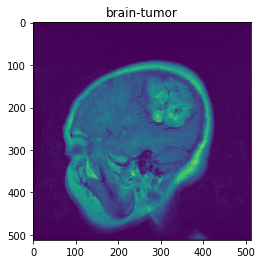

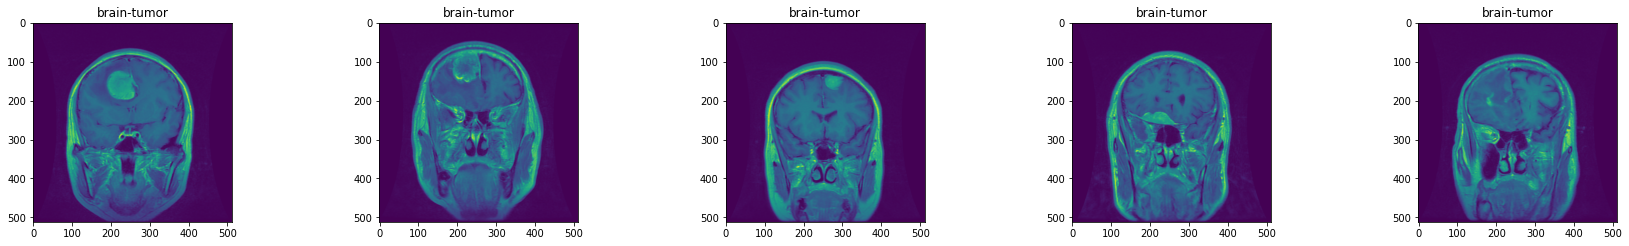

In [ ]:
from PIL import Image

queryIdx = 2 # Input Index for which images 

queryFeatures = features_retrieved[queryIdx]
results = perform_search(queryFeatures, training_indexed, max_results=5)

imgs = []
result_path = []

# loop over the results
for (d, j) in results:
    img = np.array(Image.open(dataset_train[j]))
    result_path.append(dataset_train[j])
    imgs.append(img)

# display the query image
plt.title(dataset[queryIdx].split("/")[2])
plt.imshow(np.array(Image.open(dataset[queryIdx])))

plt.figure(figsize=(30,30))
columns = 5
for i, image in enumerate(imgs):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    result_label = result_path[i].split("/")[2]
    plt.title(result_label)
    plt.imshow(image)

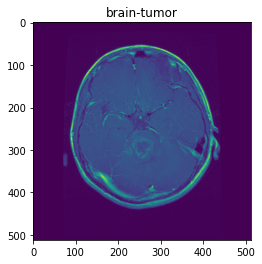

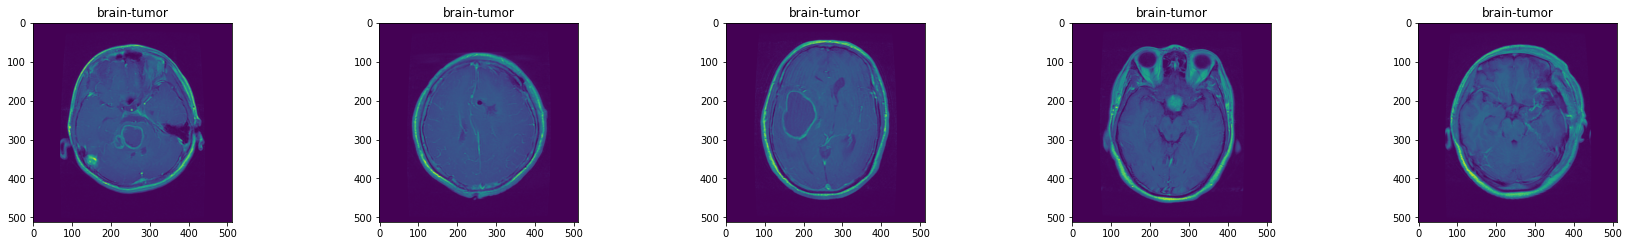

In [ ]:
queryIdx = 18 # Input Index for which images 

queryFeatures = features_retrieved[queryIdx]
results = perform_search(queryFeatures, training_indexed, max_results=5)

imgs = []
result_path = []

# loop over the results
for (d, j) in results:
    img = np.array(Image.open(dataset_train[j]))
    result_path.append(dataset_train[j])
    imgs.append(img)

# display the query image
plt.title(dataset[queryIdx].split("/")[2])
plt.imshow(np.array(Image.open(dataset[queryIdx])))

plt.figure(figsize=(30,30))
columns = 5
for i, image in enumerate(imgs):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    result_label = result_path[i].split("/")[2]
    plt.title(result_label)
    plt.imshow(image)

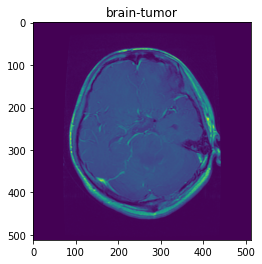

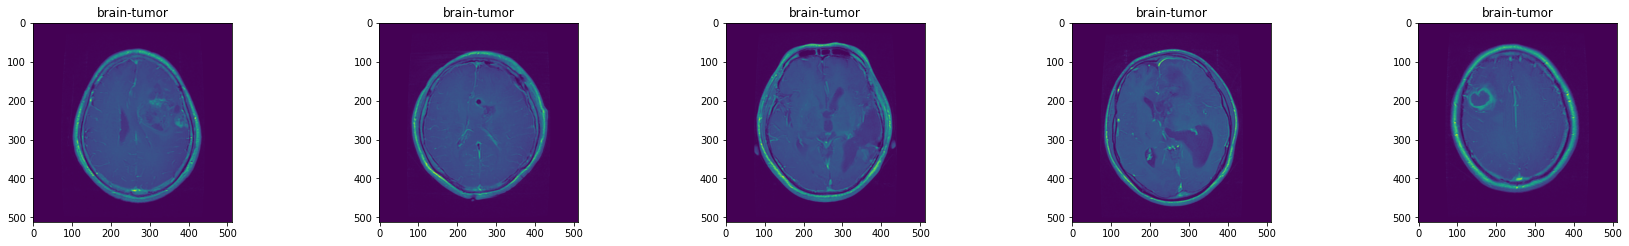

In [ ]:
queryIdx = 10 # Input Index for which images 

queryFeatures = features_retrieved[queryIdx]
results = perform_search(queryFeatures, training_indexed, max_results=5)

imgs = []
result_path = []

# loop over the results
for (d, j) in results:
    img = np.array(Image.open(dataset_train[j]))
    result_path.append(dataset_train[j])
    imgs.append(img)

# display the query image
plt.title(dataset[queryIdx].split("/")[2])
plt.imshow(np.array(Image.open(dataset[queryIdx])))

plt.figure(figsize=(30,30))
columns = 5
for i, image in enumerate(imgs):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    result_label = result_path[i].split("/")[2]
    plt.title(result_label)
    plt.imshow(image)